In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers, optimizers
#from sklearn import s.vm, datasets

In [ ]:
names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'Class'] 
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=names)
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', names=names)
data 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
data.x11.value_counts()

1.0    142
2.0    140
3.0     21
Name: x11, dtype: int64

In [ ]:
data.x12.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: x12, dtype: int64

In [ ]:
data.x13.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: x13, dtype: int64

In [ ]:
outliers = data.x13[(data.x13 == '?')]
print(outliers)

87     ?
266    ?
Name: x13, dtype: object


In [ ]:
data.x13 = data.x13.replace(to_replace =['?'], value =np.nan)
data.x12 = data.x12.replace(to_replace =['?'], value =np.nan)

In [ ]:
data.x13.isnull().any()

True

In [ ]:
data.Class.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Class, dtype: int64

In [ ]:
data.Class = data.Class.replace(to_replace =[1, 2, 3, 4], value =1)

In [ ]:
data = data.dropna()
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [ ]:
data.Class.value_counts()

0    160
1    137
Name: Class, dtype: int64

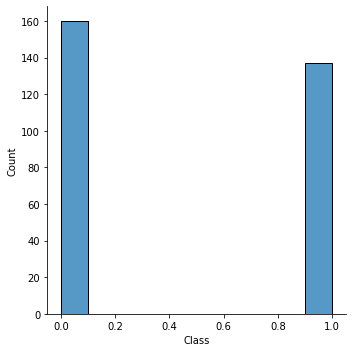

In [ ]:
sns.displot(data.Class, kind='hist')

In [ ]:
data.dtypes

x1       float64
x2       float64
x3       float64
x4       float64
x5       float64
x6       float64
x7       float64
x8       float64
x9       float64
x10      float64
x11      float64
x12       object
x13       object
Class      int64
dtype: object

In [ ]:
data.x12 = data.x12.astype(float)
data.x13 = data.x13.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.dtypes

x1       float64
x2       float64
x3       float64
x4       float64
x5       float64
x6       float64
x7       float64
x8       float64
x9       float64
x10      float64
x11      float64
x12      float64
x13      float64
Class      int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
def standardscal(s,c,cc):
  x = (cc+'sc')
  sc = StandardScaler()
  c[x] = sc.fit_transform(s)
  c.pop(cc)
  return c[x]

In [ ]:
standardscal((data[['x1']]), data, ('x1'))
standardscal((data[['x2']]), data, ('x2'))
standardscal((data[['x3']]), data, ('x3'))
standardscal((data[['x4']]), data, ('x4'))
standardscal((data[['x5']]), data, ('x5'))
standardscal((data[['x6']]), data, ('x6'))
standardscal((data[['x7']]), data, ('x7'))
standardscal((data[['x8']]), data, ('x8'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

0      0.017494
1     -1.816334
2     -0.899420
3      1.633010
4      0.978071
         ...   
297   -1.161395
298   -0.768432
299   -0.375469
300   -1.510696
301    1.065396
Name: x8sc, Length: 297, dtype: float64

In [ ]:
standardscal((data[['x9']]), data, ('x9'))
standardscal((data[['x10']]), data, ('x10'))
standardscal((data[['x11']]), data, ('x11'))
standardscal((data[['x12']]), data, ('x12'))
standardscal((data[['x13']]), data, ('x13'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

0      0.655877
1     -0.894220
2      1.172577
3     -0.894220
4     -0.894220
         ...   
297    1.172577
298    1.172577
299    1.172577
300    1.172577
301   -0.894220
Name: x13sc, Length: 297, dtype: float64

In [ ]:
data.dtypes

Class      int64
x1sc     float64
x2sc     float64
x3sc     float64
x4sc     float64
x5sc     float64
x6sc     float64
x7sc     float64
x8sc     float64
x9sc     float64
x10sc    float64
x11sc    float64
x12sc    float64
x13sc    float64
dtype: object

In [ ]:
data.corr()

,Class,x1sc,x2sc,x3sc,x4sc,x5sc,x6sc,x7sc,x8sc,x9sc,x10sc,x11sc,x12sc,x13sc
Class,1.000000,0.227075,0.278467,0.408945,0.153490,0.080285,0.003167,0.166343,-0.423817,0.421355,0.424052,0.333049,0.463189,0.526640
x1sc,0.227075,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586
x2sc,0.278467,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652
x3sc,0.408945,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500
x4sc,0.153490,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183
x5sc,0.080285,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859
x6sc,0.003167,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209
x7sc,0.166343,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795
x8sc,-0.423817,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831
x9sc,0.421355,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927


In [ ]:
#data = data.drop(['x2','x5','x6','x9'],axis=1)
data = data.drop(['x5sc','x6sc','x8sc'],axis=1)

In [ ]:
data.dtypes

Class      int64
x1sc     float64
x2sc     float64
x3sc     float64
x4sc     float64
x7sc     float64
x9sc     float64
x10sc    float64
x11sc    float64
x12sc    float64
x13sc    float64
dtype: object

In [ ]:
data.isnull().any()

Class    False
x1sc     False
x2sc     False
x3sc     False
x4sc     False
x7sc     False
x9sc     False
x10sc    False
x11sc    False
x12sc    False
x13sc    False
dtype: bool

In [ ]:
data.corr()

,Class,x1sc,x2sc,x3sc,x4sc,x7sc,x9sc,x10sc,x11sc,x12sc,x13sc
Class,1.000000,0.227075,0.278467,0.408945,0.153490,0.166343,0.421355,0.424052,0.333049,0.463189,0.526640
x1sc,0.227075,1.000000,-0.092399,0.110471,0.290476,0.149917,0.096489,0.197123,0.159405,0.362210,0.126586
x2sc,0.278467,-0.092399,1.000000,0.008908,-0.066340,0.033897,0.143581,0.106567,0.033345,0.091925,0.383652
x3sc,0.408945,0.110471,0.008908,1.000000,-0.036980,0.063905,0.377525,0.203244,0.151079,0.235644,0.268500
x4sc,0.153490,0.290476,-0.066340,-0.036980,1.000000,0.149242,0.066691,0.191243,0.121172,0.097954,0.138183
x7sc,0.166343,0.149917,0.033897,0.063905,0.149242,1.000000,0.081874,0.113726,0.135141,0.129021,0.018795
x9sc,0.421355,0.096489,0.143581,0.377525,0.066691,0.081874,1.000000,0.289310,0.250572,0.148232,0.326927
x10sc,0.424052,0.197123,0.106567,0.203244,0.191243,0.113726,0.289310,1.000000,0.579037,0.294452,0.344976
x11sc,0.333049,0.159405,0.033345,0.151079,0.121172,0.135141,0.250572,0.579037,1.000000,0.109761,0.279688
x12sc,0.463189,0.362210,0.091925,0.235644,0.097954,0.129021,0.148232,0.294452,0.109761,1.000000,0.256382


# Model Deep Learning

In [ ]:
fitur = data.drop(columns='Class').values
label = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.3, random_state=20)

## 2 Layers, Relu Sigmoid, lr=0.01, Epoch 200, Batch 32

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu')) 
'''model.add(Dense(15, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(5, activation='relu'))'''
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 44ms/step - loss: 0.6794 - accuracy: 0.5797 - mae: 0.4711 - mse: 0.2416 - val_loss: 0.6762 - val_accuracy: 0.6111 - val_mae: 0.4667 - val_mse: 0.2397
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6563 - accuracy: 0.6135 - mae: 0.4615 - mse: 0.2312 - val_loss: 0.6544 - val_accuracy: 0.6333 - val_mae: 0.4585 - val_mse: 0.2300
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6358 - accuracy: 0.6570 - mae: 0.4528 - mse: 0.2217 - val_loss: 0.6355 - val_accuracy: 0.6444 - val_mae: 0.4505 - val_mse: 0.2213
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6178 - accuracy: 0.6957 - mae: 0.4441 - mse: 0.2134 - val_loss: 0.6185 - val_accuracy: 0.7000 - val_mae: 0.4426 - val_mse: 0.2135
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6013 - accuracy: 0.7150 - mae: 0.4357 - mse: 0.2057 - val_loss: 0.6031 - val_accuracy: 0.7222 - val_mae: 0.4352

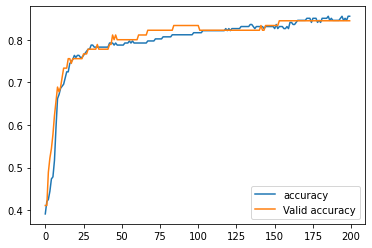

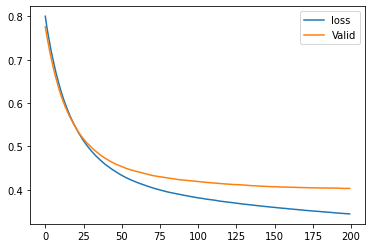

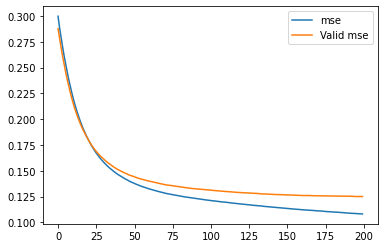

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 2 Layers, Relu Sigmoid, lr=0.001, Epochs 400, Batch 8

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=8, verbose=1)

Epoch 1/400
26/26 [==============================] - 2s 18ms/step - loss: 0.8723 - accuracy: 0.4734 - mae: 0.5298 - mse: 0.3239 - val_loss: 0.9264 - val_accuracy: 0.4222 - val_mae: 0.5491 - val_mse: 0.3476
Epoch 2/400
26/26 [==============================] - 0s 7ms/step - loss: 0.8553 - accuracy: 0.4734 - mae: 0.5266 - mse: 0.3177 - val_loss: 0.9077 - val_accuracy: 0.4222 - val_mae: 0.5449 - val_mse: 0.3408
Epoch 3/400
26/26 [==============================] - 0s 7ms/step - loss: 0.8393 - accuracy: 0.4734 - mae: 0.5226 - mse: 0.3115 - val_loss: 0.8898 - val_accuracy: 0.4222 - val_mae: 0.5407 - val_mse: 0.3340
Epoch 4/400
26/26 [==============================] - 0s 6ms/step - loss: 0.8240 - accuracy: 0.4734 - mae: 0.5191 - mse: 0.3056 - val_loss: 0.8728 - val_accuracy: 0.4333 - val_mae: 0.5365 - val_mse: 0.3275
Epoch 5/400
26/26 [==============================] - 0s 5ms/step - loss: 0.8096 - accuracy: 0.4831 - mae: 0.5157 - mse: 0.2998 - val_loss: 0.8566 - val_accuracy: 0.4333 - val_mae:

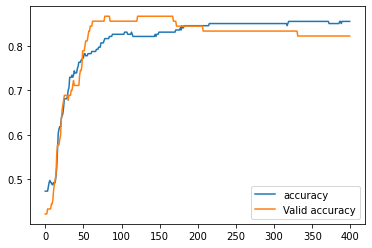

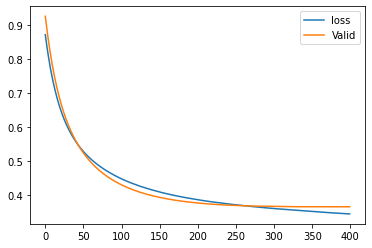

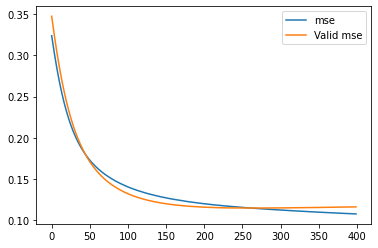

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 2 Layers, Sigmoid Sigmoid, lr=0.1, Epochs 400, Batch 32

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='sigmoid')) 
'''model.add(Dense(15, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(5, activation='relu'))'''
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.1), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=32, verbose=1)

Epoch 1/400
7/7 [==============================] - 1s 36ms/step - loss: 0.7030 - accuracy: 0.5217 - mae: 0.4999 - mse: 0.2548 - val_loss: 0.6810 - val_accuracy: 0.5889 - val_mae: 0.4903 - val_mse: 0.2439
Epoch 2/400
7/7 [==============================] - 0s 10ms/step - loss: 0.6565 - accuracy: 0.6522 - mae: 0.4775 - mse: 0.2319 - val_loss: 0.6374 - val_accuracy: 0.6889 - val_mae: 0.4674 - val_mse: 0.2224
Epoch 3/400
7/7 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.7198 - mae: 0.4615 - mse: 0.2185 - val_loss: 0.6050 - val_accuracy: 0.7222 - val_mae: 0.4492 - val_mse: 0.2067
Epoch 4/400
7/7 [==============================] - 0s 9ms/step - loss: 0.5981 - accuracy: 0.7729 - mae: 0.4432 - mse: 0.2037 - val_loss: 0.5791 - val_accuracy: 0.8222 - val_mae: 0.4333 - val_mse: 0.1944
Epoch 5/400
7/7 [==============================] - 0s 8ms/step - loss: 0.5723 - accuracy: 0.7826 - mae: 0.4272 - mse: 0.1915 - val_loss: 0.5740 - val_accuracy: 0.7556 - val_mae: 0.4252 -

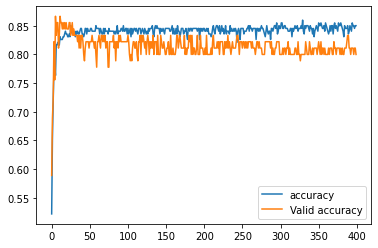

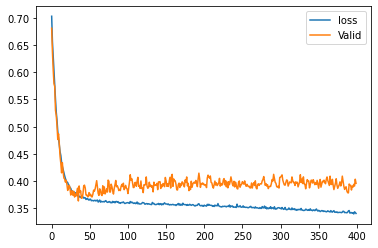

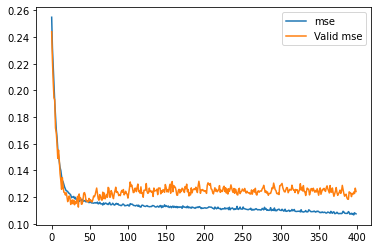

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 2 Layers, Relu Sigmoid, lr=0.001, Epochs 400, Batch 16

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=16, verbose=1)

Epoch 1/400
13/13 [==============================] - 1s 19ms/step - loss: 0.7952 - accuracy: 0.3768 - mae: 0.5331 - mse: 0.2983 - val_loss: 0.8133 - val_accuracy: 0.3778 - val_mae: 0.5410 - val_mse: 0.3068
Epoch 2/400
13/13 [==============================] - 0s 5ms/step - loss: 0.7891 - accuracy: 0.3768 - mae: 0.5307 - mse: 0.2955 - val_loss: 0.8071 - val_accuracy: 0.3778 - val_mae: 0.5386 - val_mse: 0.3040
Epoch 3/400
13/13 [==============================] - 0s 5ms/step - loss: 0.7833 - accuracy: 0.3816 - mae: 0.5283 - mse: 0.2928 - val_loss: 0.8010 - val_accuracy: 0.3889 - val_mae: 0.5363 - val_mse: 0.3012
Epoch 4/400
13/13 [==============================] - 0s 5ms/step - loss: 0.7774 - accuracy: 0.3913 - mae: 0.5260 - mse: 0.2901 - val_loss: 0.7951 - val_accuracy: 0.3889 - val_mae: 0.5339 - val_mse: 0.2984
Epoch 5/400
13/13 [==============================] - 0s 5ms/step - loss: 0.7718 - accuracy: 0.3961 - mae: 0.5237 - mse: 0.2874 - val_loss: 0.7892 - val_accuracy: 0.4111 - val_mae:

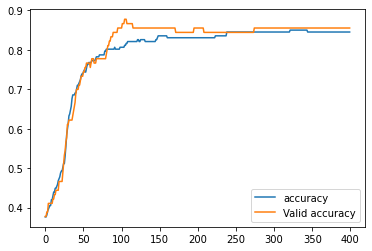

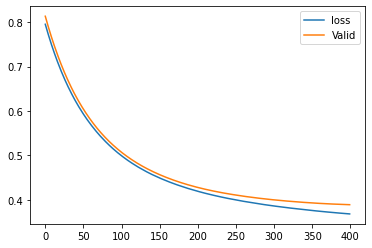

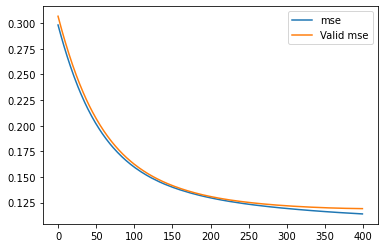

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 4 Layers, Relu Relu Relu Sigmoid, lr=0.001, Epochs 400, Batch 16

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu')) 
model.add(Dense(25, activation='relu')) 
model.add(Dense(5, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=16, verbose=1)

Epoch 1/400
13/13 [==============================] - 1s 26ms/step - loss: 0.6706 - accuracy: 0.6280 - mae: 0.4870 - mse: 0.2388 - val_loss: 0.6534 - val_accuracy: 0.7000 - val_mae: 0.4780 - val_mse: 0.2303
Epoch 2/400
13/13 [==============================] - 0s 6ms/step - loss: 0.6698 - accuracy: 0.6425 - mae: 0.4865 - mse: 0.2384 - val_loss: 0.6525 - val_accuracy: 0.7000 - val_mae: 0.4775 - val_mse: 0.2298
Epoch 3/400
13/13 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6570 - mae: 0.4861 - mse: 0.2380 - val_loss: 0.6516 - val_accuracy: 0.6889 - val_mae: 0.4770 - val_mse: 0.2294
Epoch 4/400
13/13 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.6618 - mae: 0.4856 - mse: 0.2375 - val_loss: 0.6508 - val_accuracy: 0.6889 - val_mae: 0.4766 - val_mse: 0.2290
Epoch 5/400
13/13 [==============================] - 0s 6ms/step - loss: 0.6672 - accuracy: 0.6618 - mae: 0.4851 - mse: 0.2371 - val_loss: 0.6499 - val_accuracy: 0.6889 - val_mae:

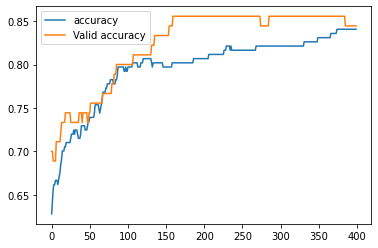

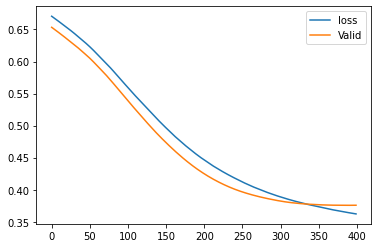

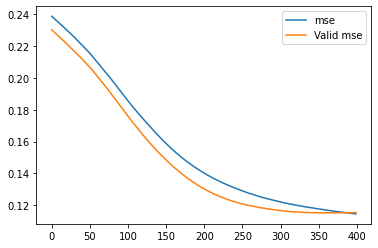

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 3 Layers, Relu Relu Sigmoid, lr=0.01, Epochs 200, Batch 32, mae

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='linear'))

model.compile(loss="mean_absolute_error", optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 76ms/step - loss: 0.5699 - accuracy: 0.5217 - mae: 0.5699 - mse: 0.4697 - val_loss: 0.5243 - val_accuracy: 0.5444 - val_mae: 0.5243 - val_mse: 0.4064
Epoch 2/200
7/7 [==============================] - 0s 18ms/step - loss: 0.5335 - accuracy: 0.5314 - mae: 0.5335 - mse: 0.3934 - val_loss: 0.4917 - val_accuracy: 0.5778 - val_mae: 0.4917 - val_mse: 0.3473
Epoch 3/200
7/7 [==============================] - 0s 19ms/step - loss: 0.5083 - accuracy: 0.5362 - mae: 0.5083 - mse: 0.3504 - val_loss: 0.4641 - val_accuracy: 0.6111 - val_mae: 0.4641 - val_mse: 0.3019
Epoch 4/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4848 - accuracy: 0.5749 - mae: 0.4848 - mse: 0.3139 - val_loss: 0.4392 - val_accuracy: 0.6556 - val_mae: 0.4392 - val_mse: 0.2676
Epoch 5/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4631 - accuracy: 0.6087 - mae: 0.4631 - mse: 0.2870 - val_loss: 0.4159 - val_accuracy: 0.6778 - val_mae: 0.415

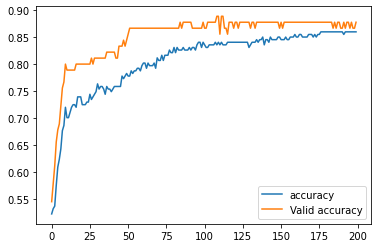

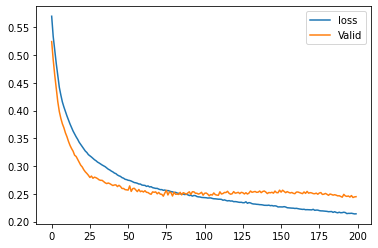

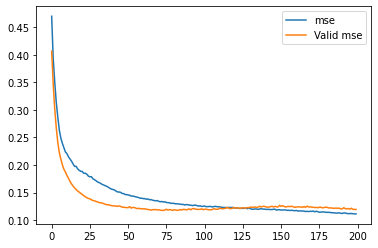

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 1 Layer, Sigmoid, adam, Epochs 200, Batch 32


In [ ]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 78ms/step - loss: 0.8381 - accuracy: 0.4638 - mae: 0.5206 - mse: 0.3104 - val_loss: 0.8230 - val_accuracy: 0.5222 - val_mae: 0.5140 - val_mse: 0.2979
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 0.8257 - accuracy: 0.4734 - mae: 0.5163 - mse: 0.3054 - val_loss: 0.8114 - val_accuracy: 0.5222 - val_mae: 0.5098 - val_mse: 0.2933
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.8136 - accuracy: 0.4928 - mae: 0.5120 - mse: 0.3003 - val_loss: 0.7998 - val_accuracy: 0.5222 - val_mae: 0.5054 - val_mse: 0.2886
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.8015 - accuracy: 0.5072 - mae: 0.5076 - mse: 0.2953 - val_loss: 0.7889 - val_accuracy: 0.5333 - val_mae: 0.5013 - val_mse: 0.2842
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 0.7905 - accuracy: 0.5169 - mae: 0.5036 - mse: 0.2907 - val_loss: 0.7777 - val_accuracy: 0.5556 - val_mae: 0.497

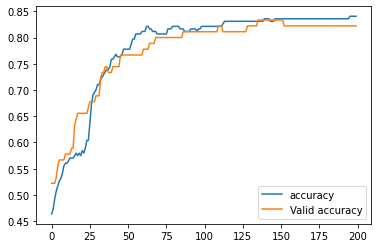

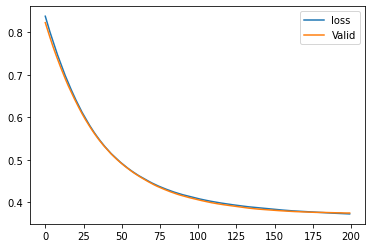

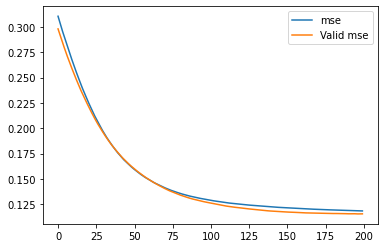

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 1 Layer, Sigmoid, adam, Epochs 400, Batch 32


In [ ]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=32, verbose=1)

Epoch 1/400
7/7 [==============================] - 1s 42ms/step - loss: 0.9159 - accuracy: 0.5121 - mae: 0.4885 - mse: 0.3197 - val_loss: 0.8605 - val_accuracy: 0.6000 - val_mae: 0.4749 - val_mse: 0.2970
Epoch 2/400
7/7 [==============================] - 0s 6ms/step - loss: 0.9049 - accuracy: 0.5121 - mae: 0.4855 - mse: 0.3162 - val_loss: 0.8500 - val_accuracy: 0.6000 - val_mae: 0.4720 - val_mse: 0.2937
Epoch 3/400
7/7 [==============================] - 0s 9ms/step - loss: 0.8939 - accuracy: 0.5121 - mae: 0.4826 - mse: 0.3127 - val_loss: 0.8397 - val_accuracy: 0.6000 - val_mae: 0.4691 - val_mse: 0.2904
Epoch 4/400
7/7 [==============================] - 0s 7ms/step - loss: 0.8830 - accuracy: 0.5169 - mae: 0.4796 - mse: 0.3092 - val_loss: 0.8297 - val_accuracy: 0.6111 - val_mae: 0.4662 - val_mse: 0.2872
Epoch 5/400
7/7 [==============================] - 0s 6ms/step - loss: 0.8730 - accuracy: 0.5217 - mae: 0.4769 - mse: 0.3060 - val_loss: 0.8196 - val_accuracy: 0.6111 - val_mae: 0.4633 - 

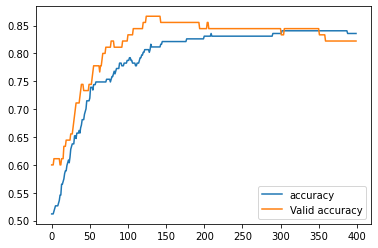

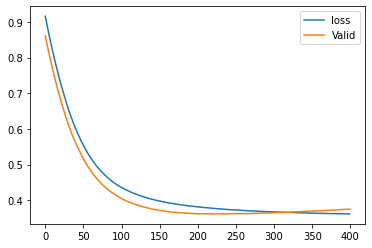

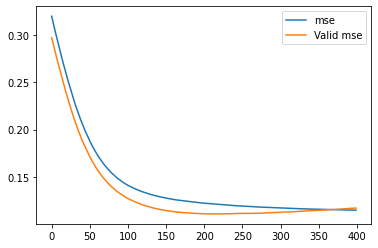

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 1 Layer, Sigmoid, lr=0.01, Epochs 200, Batch 32


In [ ]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 67ms/step - loss: 0.8985 - accuracy: 0.4541 - mae: 0.5277 - mse: 0.3256 - val_loss: 0.9975 - val_accuracy: 0.3778 - val_mae: 0.5577 - val_mse: 0.3627
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 0.8698 - accuracy: 0.4976 - mae: 0.5174 - mse: 0.3144 - val_loss: 0.9665 - val_accuracy: 0.4111 - val_mae: 0.5485 - val_mse: 0.3515
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.8436 - accuracy: 0.5121 - mae: 0.5082 - mse: 0.3044 - val_loss: 0.9374 - val_accuracy: 0.4667 - val_mae: 0.5393 - val_mse: 0.3408
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.8190 - accuracy: 0.5314 - mae: 0.4989 - mse: 0.2946 - val_loss: 0.9090 - val_accuracy: 0.4667 - val_mae: 0.5299 - val_mse: 0.3301
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 0.7951 - accuracy: 0.5411 - mae: 0.4899 - mse: 0.2853 - val_loss: 0.8821 - val_accuracy: 0.4889 - val_mae: 0.520

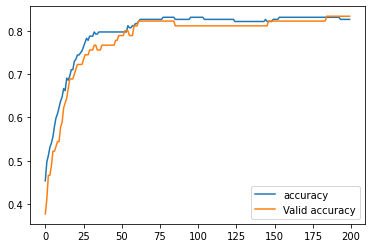

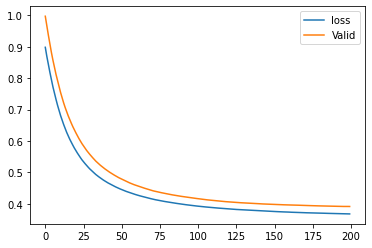

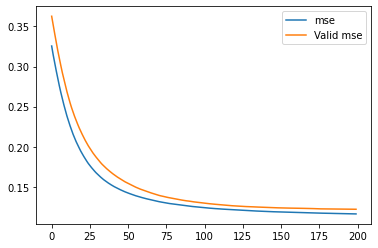

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 1 Layer, Sigmoid, lr=0.01, Epochs 400, Batch 32


In [ ]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=32, verbose=1)

Epoch 1/400
7/7 [==============================] - 1s 66ms/step - loss: 1.0709 - accuracy: 0.3285 - mae: 0.6015 - mse: 0.4009 - val_loss: 1.0121 - val_accuracy: 0.3556 - val_mae: 0.5741 - val_mse: 0.3750
Epoch 2/400
7/7 [==============================] - 0s 14ms/step - loss: 1.0260 - accuracy: 0.3382 - mae: 0.5899 - mse: 0.3855 - val_loss: 0.9699 - val_accuracy: 0.3778 - val_mae: 0.5628 - val_mse: 0.3601
Epoch 3/400
7/7 [==============================] - 0s 14ms/step - loss: 0.9854 - accuracy: 0.3478 - mae: 0.5787 - mse: 0.3708 - val_loss: 0.9306 - val_accuracy: 0.4000 - val_mae: 0.5516 - val_mse: 0.3458
Epoch 4/400
7/7 [==============================] - 0s 14ms/step - loss: 0.9471 - accuracy: 0.3720 - mae: 0.5676 - mse: 0.3566 - val_loss: 0.8932 - val_accuracy: 0.4222 - val_mae: 0.5402 - val_mse: 0.3317
Epoch 5/400
7/7 [==============================] - 0s 13ms/step - loss: 0.9109 - accuracy: 0.3913 - mae: 0.5560 - mse: 0.3422 - val_loss: 0.8586 - val_accuracy: 0.4333 - val_mae: 0.529

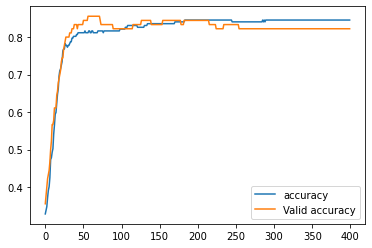

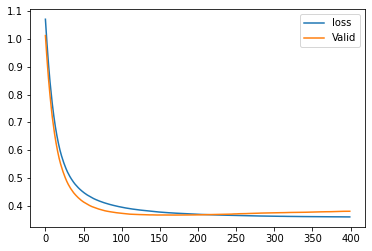

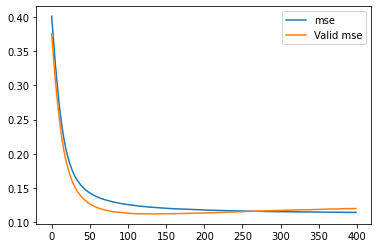

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

## 1 Layer, Sigmoid, lr=0.01, Epochs 200, Batch 64


In [ ]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy','mae', 'mse'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 67ms/step - loss: 0.8492 - accuracy: 0.3623 - mae: 0.5471 - mse: 0.3223 - val_loss: 0.8202 - val_accuracy: 0.4000 - val_mae: 0.5363 - val_mse: 0.3085
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.8322 - accuracy: 0.3720 - mae: 0.5410 - mse: 0.3148 - val_loss: 0.8025 - val_accuracy: 0.4333 - val_mae: 0.5295 - val_mse: 0.3005
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.8142 - accuracy: 0.3913 - mae: 0.5342 - mse: 0.3067 - val_loss: 0.7852 - val_accuracy: 0.4444 - val_mae: 0.5225 - val_mse: 0.2925
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.7968 - accuracy: 0.3961 - mae: 0.5275 - mse: 0.2988 - val_loss: 0.7692 - val_accuracy: 0.4667 - val_mae: 0.5159 - val_mse: 0.2851
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 0.7808 - accuracy: 0.4058 - mae: 0.5211 - mse: 0.2914 - val_loss: 0.7524 - val_accuracy: 0.4667 - val_mae: 0.508

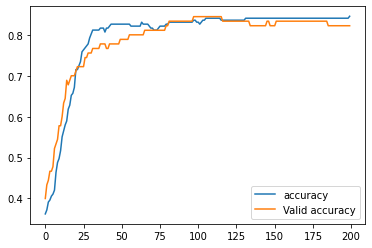

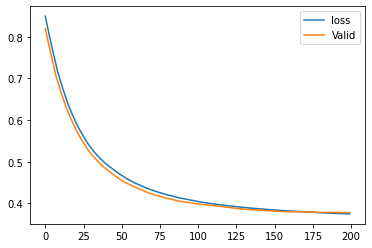

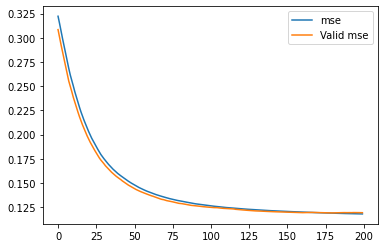

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()